## Task

### MOVIESET

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('movie_set.csv')

#### 1. Which actor/actress has done the most number of Action movies

In [8]:
action = data[data.genres == 'Action']

In [33]:
action[['actor1','actor2', 'actor3', 'actor4', 'actor5']] = action.cast.str.split("|", expand= True)

/home/paramathma/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [87]:
action_1 = pd.DataFrame(action.actor1.value_counts(), columns={'actor1': 'actor'})
action_1.rename(columns={'actor1': 'actor'}, inplace= True)
action_2 = pd.DataFrame(action.actor2.value_counts())
action_2.rename(columns={'actor2': 'actor'}, inplace= True)
action_3 = pd.DataFrame(action.actor3.value_counts())
action_3.rename(columns={'actor3': 'actor'}, inplace= True)
action_4 = pd.DataFrame(action.actor4.value_counts())
action_4.rename(columns={'actor4': 'actor'}, inplace= True)
action_5 = pd.DataFrame(action.actor5.value_counts())
action_5.rename(columns={'actor5': 'actor'}, inplace= True)
frames = [action_1,action_2, action_3,action_4,action_5]

# action_star = pd.concat(frames, axis=0)

result = pd.concat(frames, axis=0)



In [219]:
print("Actor who has acted in more Action films is", result.index[:1].values)

Actor who has acted in more Action films is ['Jet Li']


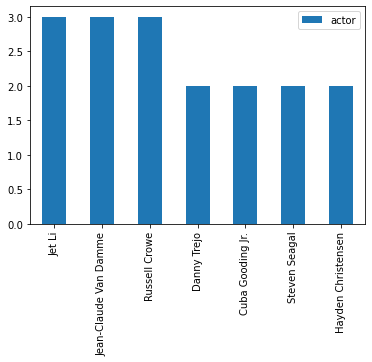

In [90]:
result[:7].plot(kind = 'bar')

####  2. What is the total revenue of movies produced by "Twentieth Century Fox Film Corporation" that were released after the year 2000 and had the actor Will Smith in it?

In [122]:
data[['actor1','actor2', 'actor3', 'actor4', 'actor5']] = data.cast.str.split("|", expand= True)

In [98]:
data[['company1','company2', 'company3', 'company4', 'company5']] = data.production_companies.str.split("|", expand= True)

In [124]:
fox_producer = data[(data.company1 == "Twentieth Century Fox Film Corporation") | (data.company2 == "Twentieth Century Fox Film Corporation")|(data.company3 == "Twentieth Century Fox Film Corporation")|(data.company4 == "Twentieth Century Fox Film Corporation")|(data.company5 == "Twentieth Century Fox Film Corporation")]

In [236]:
total_movie_list = fox_producer[(fox_producer.actor1 == 'Will Smith')|(fox_producer.actor2 == 'Will Smith')|(fox_producer.actor3 == 'Will Smith')|(fox_producer.actor4 == 'Will Smith')|(fox_producer.actor5 == 'Will Smith') &(fox_producer.release_year >2000)]

In [237]:
print("Total revenue of movies produced by Twentieth Century Fox Film Corporation that were released after the year 2000 and where  actor Was Smith is ", total_movie_list.revenue.sum())

Total revenue of movies produced by Twentieth Century Fox Film Corporation that were released after the year 2000 and where  actor Was Smith is  1203663611


Text(0.5, 1.0, 'Movies with actor as a Smith and released after the year 2000')

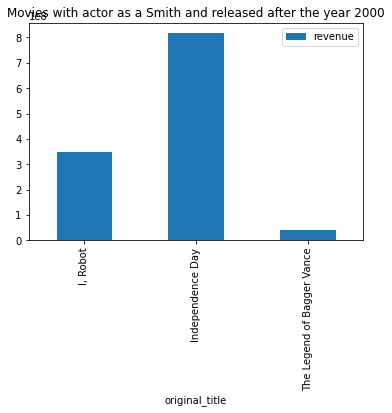

In [239]:
total_movie_list.plot(x = 'original_title', y= 'revenue', kind = 'bar')
plt.title("Movies with actor as a Smith and released after the year 2000")

#### Total Revenue got for  only Twentieth Century Fox Film Corporation(Single hand producer)

In [242]:
fox_produced  = data[data.production_companies =="Twentieth Century Fox Film Corporation"]
fox_produced[(fox_produced.actor1 == 'Will Smith')|(fox_produced.actor2 == 'Will Smith')|(fox_produced.actor3 == 'Will Smith')|(fox_produced.actor4 == 'Will Smith')|(fox_produced.actor5 == 'Will Smith') &(fox_produced.release_year >2000)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,company1,company2,company3,company4,company5,actor1,actor2,actor3,actor4,actor5


#### Result : The above query says that there are no movies produced by the Twentieth Century Fox Film Corporation with after year 2000 with actor as WILL SMith

#### 3. Create a summary dataset listing different movie genre and the production company making most movies in the particular genre.

In [164]:
new= pd.DataFrame(data.groupby('genres').production_companies.value_counts())

In [173]:
new.rename(columns= {"production_companies": "count"}, inplace = True)

In [185]:
genre_production = new.sort_values(by = 'count', ascending= False)[:1]
genre_production.reset_index(inplace= True)
genre_production


,genres,production_companies,count
0,Comedy,Paramount Pictures,23


In [200]:
print(genre_production.production_companies.values,"is a produxtion company which did maximium movies of count of ", genre_production['count'].values, "in a genre of",genre_production.genres.values)

['Paramount Pictures'] is a produxtion company which did maximium movies of count of  [23] in a genre of ['Comedy']


Text(0, 0.5, 'No. of movies')

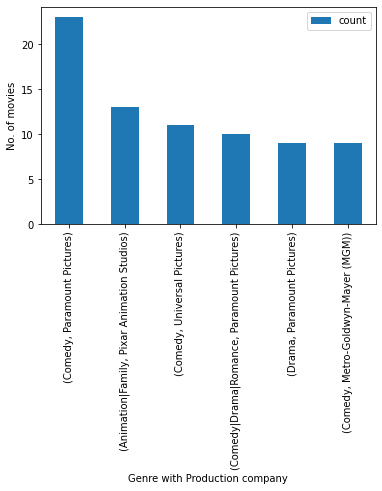

In [204]:
new.sort_values(by = 'count', ascending= False)[:6].plot(kind = 'bar')
plt.xlabel('Genre with Production company')
plt.ylabel("No. of movies")

#### 4. Rank the production company based on the mean popularity of the produced movies.

In [213]:
rank_data = pd.DataFrame(data.groupby('production_companies').popularity.mean())
rank_data.reset_index(inplace = True)

print("The Top Five Production comapnies with their mean is as follows :")
print(rank_data.sort_values(by= 'popularity', ascending = False).set_index("production_companies")[:5])

The Top Five Production comapnies with their mean is as follows :
                                                    popularity
production_companies                                          
Universal Studios|Amblin Entertainment|Legendar...   32.985763
Village Roadshow Pictures|Kennedy Miller Produc...   28.419936
Paramount Pictures|Legendary Pictures|Warner Br...   24.949134
Marvel Studios|Moving Picture Company (MPC)|Bul...   14.311205
Summit Entertainment|Mandeville Films|Red Wagon...   13.112507


Text(0, 0.5, 'mean popularity value')

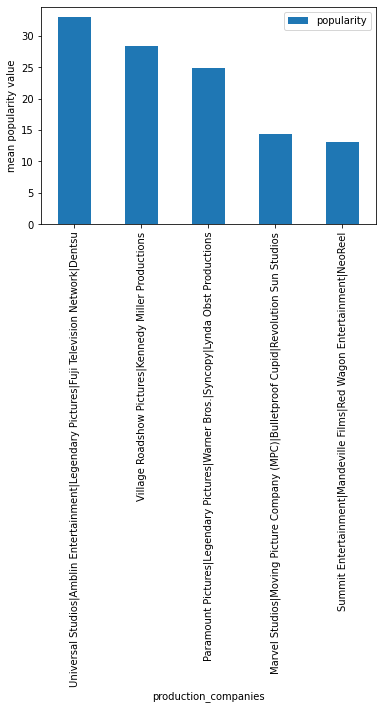

In [216]:
rank_data.sort_values(by= 'popularity', ascending = False).set_index("production_companies")[:5].plot(kind = 'bar')
plt.ylabel("mean popularity value")